In [2]:
# import libraries
import os
import numpy as np
import pandas as pd
import spacy
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [16]:
import tensorflow as tf
from tensorflow import keras

In [1]:
from gensim.models import Word2Vec
from imblearn.combine import SMOTETomek

In [3]:
# Download the English NLP model
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mominagull/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
def extract_data_from_html(html_file):
    '''
    Extract data from the html file
    :param html_file: the path to the html file
    :return: a list of words
    '''
    with open(html_file, 'r', encoding='utf-8') as f:
        content = f.read()
    
    soup = BeautifulSoup(content, 'html.parser')
    all_text = soup.get_text()
    result = [text.strip() for text in all_text.split()]

    # print(soup.prettify())
    return result

In [4]:
extract_data_from_html("./data/Balance Sheets/18320959_3.html")

['(7',
 'in',
 'lacs)',
 '(7',
 'in',
 'lacs)',
 '_1_',
 'Standalone',
 'Consolidated',
 'Sr.',
 'No.',
 'Particulars',
 'As',
 'at',
 '31stMarch',
 '2018',
 'As',
 'at',
 '31stMarch',
 '2017',
 'As',
 'at',
 '31stMarch',
 '2018',
 'As',
 'at',
 '31stMarch',
 '2017',
 'A',
 'Assets',
 '1)',
 'Non-Current',
 'Assets',
 '(a)',
 'Property,',
 'Plant',
 'and',
 'Equipment',
 '10,723.96',
 '9,281.23',
 '10,723.96',
 '9,281.23',
 '(b)',
 'Capital',
 'work',
 'in',
 'progress',
 '607.46',
 '-',
 '607.46',
 '-',
 '(c)',
 'Intangible',
 'assets',
 '17.44',
 '18.71',
 '17.44',
 '18.71',
 '(d)',
 'Financial',
 'assets',
 '(i)',
 'Non-current',
 'investments',
 '150.00',
 '150.00',
 '63.42',
 '24.69',
 '(ii)',
 'Loans',
 '-',
 '-',
 '-',
 '-',
 '(iii)',
 'Other',
 'financial',
 'assets',
 '197.66',
 '130.62',
 '197.66',
 '130.62',
 '(e)',
 'Other',
 'non-current',
 'assets',
 '-',
 '-',
 '-',
 '-',
 'Total',
 'Non-Current',
 'Assets',
 '(A)',
 '11,696.52',
 '9,580.56',
 '11,609.94',
 '9,455.25',
 

In [5]:
# extract data from all html files
file_name = []
extracted_data = []
label = []
for folder in os.listdir("./data"):
    path = os.path.join("./data", folder)
    if os.path.isdir(path):
        for html_file in os.listdir(path):
            if html_file.endswith(".html"):
                result = extract_data_from_html(os.path.join(path, html_file))
                file_name.append(html_file)
                extracted_data.append(result)
                label.append(folder)

len(file_name), len(extracted_data), len(label)

(2525, 2525, 2525)

In [6]:
# create a dataframe
df = pd.DataFrame({"file_name": file_name, "extracted_data": extracted_data, "label": label}, index=None)
df.head()

,file_name,extracted_data,label
0,18563939_13.html,"[Cash, flows, from, financing, activities, (De...",Cash Flow
1,19058356_table_173.html,"[Year, ended, 31st, March,, 2018, Year, ended,...",Cash Flow
2,18612942_table_29.html,"[PARTICULARS, As, on, 31/03/2017, As, on, 31/0...",Cash Flow
3,18600361_table_65.html,"[DESCRIPTION, Year, Ended, March, 31,, 2017, Y...",Cash Flow
4,19058355_table_139.html,"[(INR, in, Crores), Particulars, For, the, yea...",Cash Flow


In [13]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.3 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [14]:
nlp = spacy.load("en_core_web_sm")

In [6]:
def preprocessing(text):
    '''
    Preprocess the text data
    :param text: the text data
    :return: the preprocessed text data
    '''
    doc = nlp(' '.join(text))
    tokens_list = [token.lemma_.lower().strip()
                   for token in doc if token.text.lower() not in nlp.Defaults.stop_words and token.text.isalpha()
    ]

    if tokens_list:
        return ' '.join(tokens_list)
    else:
        return "No tokens found"

In [10]:
# preprocess the extracted data
df["extracted_data"] = df["extracted_data"].apply(preprocessing)
df

,file_name,extracted_data,label
0,18563939_13.html,cash flow financing activity decrease increase...,Cash Flow
1,19058356_table_173.html,year end march year end march cash flow operat...,Cash Flow
2,18612942_table_29.html,particular net profit tax add depreciation add...,Cash Flow
3,18600361_table_65.html,description year end march year end march cash...,Cash Flow
4,19058355_table_139.html,inr crore particular year end year end march m...,Cash Flow
...,...,...,...
2520,18599651_table_191.html,outstanding balances million related party rel...,Notes
2521,18646837_table_97.html,particulars december december profit year r mi...,Notes
2522,18646837_table_78.html,cash cash equivalent rupee million particulars...,Notes
2523,18646845_table_95.html,december inr lacs december inr lacs excise dut...,Notes


In [11]:
df["label"].value_counts()

label
Others              1224
Notes                690
Income Statement     305
Balance Sheets       270
Cash Flow             36
Name: count, dtype: int64

In [7]:
def word_cloud(category):
    '''
    Create a word cloud for a specific category
    :param category: the category
    :return: a word cloud
    '''
    data = df[df["label"] == category]
    text = ' '.join(data["extracted_data"].tolist())
    return WordCloud(background_color='white').generate(text)

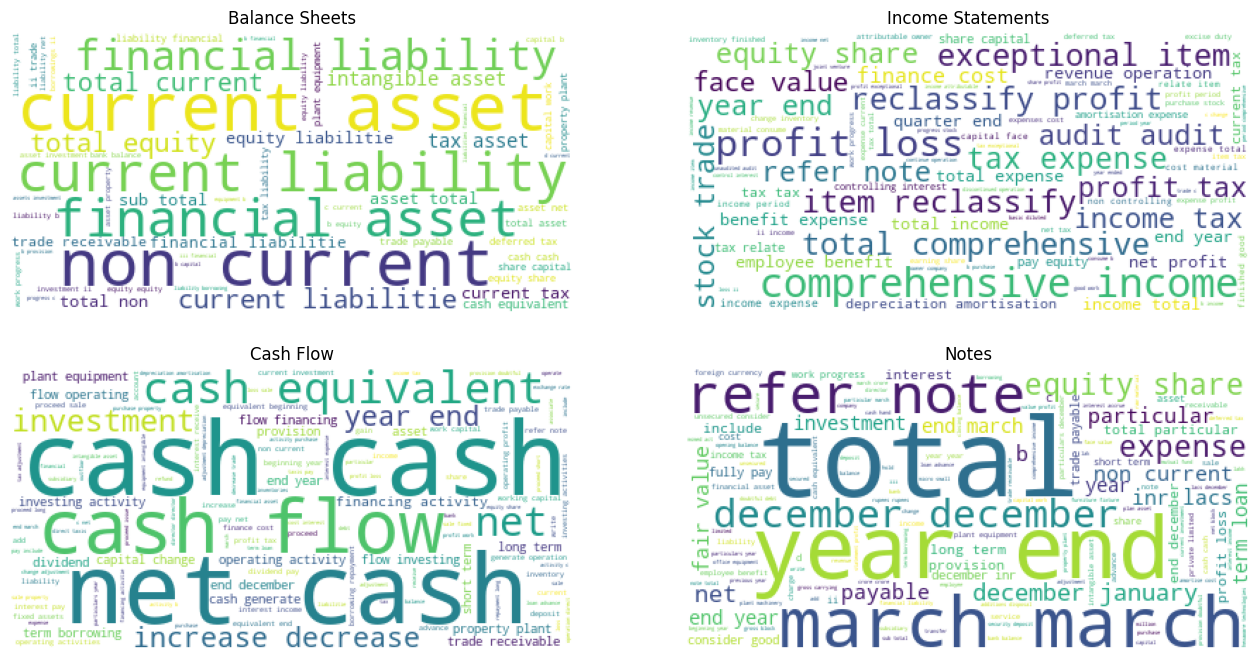

In [ ]:
# create a word cloud for each category
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(word_cloud("Balance Sheets"))
plt.title("Balance Sheets")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(word_cloud("Income Statement"))
plt.title("Income Statements")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(word_cloud("Cash Flow"))
plt.title("Cash Flow")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(word_cloud("Notes"))
plt.title("Notes")
plt.axis("off")
plt.show()


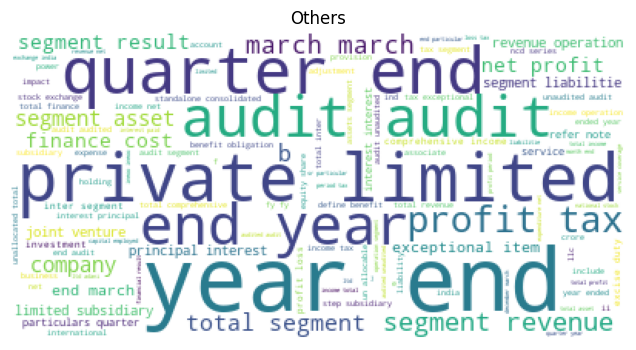

In [14]:
plt.figure(figsize=(8, 4))
plt.imshow(word_cloud("Others"))
plt.title("Others")
plt.axis("off")
plt.show()

In [15]:
# tokenize the sentences
tokenized_sentences = []
for sentence in df["extracted_data"]:
    token_list = []
    for token in word_tokenize(sentence):
        if token not in token_list:
            token_list.append(token)
    tokenized_sentences.append(token_list)

In [16]:
print(len(tokenized_sentences))
print(tokenized_sentences[0:2])

2525
[['cash', 'flow', 'financing', 'activity', 'decrease', 'increase', 'principal', 'capital', 'leaseobligation', 'net', 'proceed', 'short', 'term', 'borrowing', 'repayment', 'long', 'debt', 'buyback', 'equity', 'share', 'include', 'transaction', 'cost', 'payment', 'deferred', 'consideration', 'business', 'acquisition', 'issuance', 'subscription', 'pende', 'allotment', 'dividend', 'pay', 'excess', 'tax', 'benefit', 'relate', 'stock', 'option', 'exercise', 'effect', 'exchange', 'rate', 'change', 'cashequivalent', 'equivalent', 'beginning', 'year', 'end', 'supplemental', 'disclosure', 'issue', 'geometric', 'limited', 'property', 'equipment', 'acquire', 'lease', 'obligation', 'interest', 'expense', 'income', 'taxis'], ['year', 'end', 'march', 'cash', 'flow', 'operating', 'activity', 'profit', 'exceptional', 'item', 'tax', 'adjustments', 'share', 'net', 'associate', 'joint', 'venture', 'account', 'equity', 'method', 'bad', 'debts', 'advance', 'claim', 'deposit', 'write', 'provision', 'dou

In [ ]:
# create a Word2Vec model using the tokenized sentences
model = Word2Vec(tokenized_sentences, vector_size=300, window=5, min_count=1)
model

In [18]:
model.wv["profit"]

array([ 2.95414985e-03,  4.96487945e-01, -4.52765852e-01,  4.58843172e-01,
       -2.57151842e-01,  1.64208949e-01,  4.01694417e-01,  8.71048093e-01,
       -4.25817877e-01,  1.93654105e-01,  1.32010326e-01, -1.58109486e-01,
       -1.54044768e-02, -3.89697313e-01,  1.07218690e-01,  1.42070860e-01,
        4.29188848e-01, -6.39201283e-01,  3.49343836e-01, -2.11318791e-01,
        7.45336056e-01, -4.37580161e-02,  4.56894726e-01, -2.50722945e-01,
       -7.18968883e-02, -7.05978200e-02, -6.74415112e-01, -2.96963394e-01,
       -3.18525523e-01, -7.22012877e-01, -9.96486694e-02, -2.56787390e-01,
       -2.16510631e-02,  4.59889442e-01,  1.05213206e-02,  1.48843780e-01,
        1.27208486e-01, -5.08103788e-01,  1.85430884e-01, -1.36508361e-01,
       -4.07489449e-01, -2.32917845e-01, -3.75164628e-01, -1.35168880e-01,
       -3.14092577e-01,  8.07490170e-01,  2.89606631e-01, -1.84350207e-01,
       -1.14122063e-01,  4.22591299e-01,  1.31070450e-01,  4.69819337e-01,
       -4.25137505e-02,  

In [19]:
model.wv.most_similar("profit")

[('exceptional', 0.9921663403511047),
 ('items', 0.9727402925491333),
 ('rofit', 0.971102774143219),
 ('item', 0.9701984524726868),
 ('andexceptional', 0.9690821170806885),
 ('itemsand', 0.965139627456665),
 ('loss', 0.9625681638717651),
 ('accountedinvestee', 0.9580523371696472),
 ('andtax', 0.9569065570831299),
 ('extraordinary', 0.955649733543396)]

In [20]:
model.save("word2vec_model.bin")

In [8]:
def sentence_embeddings(sentence, model):
    '''
    Create sentence embeddings using the word2vec model
    :param sentence: the sentence
    :param model: the word2vec model
    :return: the sentence embeddings
    '''
    words = word_tokenize(sentence)
    vectors = [model.wv[word] for word in words if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [23]:
df["embeddings"] = df["extracted_data"].apply(lambda x: sentence_embeddings(x, model))
df

,file_name,extracted_data,label,embeddings
0,18563939_13.html,cash flow financing activity decrease increase...,Cash Flow,"[-0.040456254, 0.19958887, 0.08606397, 0.20926..."
1,19058356_table_173.html,year end march year end march cash flow operat...,Cash Flow,"[0.038255192, 0.30210575, 0.026735483, 0.28624..."
2,18612942_table_29.html,particular net profit tax add depreciation add...,Cash Flow,"[-0.011807439, 0.24546601, 0.00756141, 0.25210..."
3,18600361_table_65.html,description year end march year end march cash...,Cash Flow,"[-0.05782788, 0.2557691, 0.009777751, 0.218145..."
4,19058355_table_139.html,inr crore particular year end year end march m...,Cash Flow,"[-0.10933781, 0.23471068, 0.07569523, 0.195735..."
...,...,...,...,...
2520,18599651_table_191.html,outstanding balances million related party rel...,Notes,"[-0.008458765, 0.19732454, 0.053460605, 0.1981..."
2521,18646837_table_97.html,particulars december december profit year r mi...,Notes,"[-0.10677733, 0.30986673, -0.007757792, -0.011..."
2522,18646837_table_78.html,cash cash equivalent rupee million particulars...,Notes,"[-0.15158512, 0.24589325, 0.068539254, 0.08891..."
2523,18646845_table_95.html,december inr lacs december inr lacs excise dut...,Notes,"[-0.019608527, 0.3209855, -0.023186143, 0.0219..."


In [ ]:
df = df.drop(columns=["extracted_data", "file_name"], axis=1)
df

,label,embeddings
0,Cash Flow,"[-0.040456254, 0.19958887, 0.08606397, 0.20926..."
1,Cash Flow,"[0.038255192, 0.30210575, 0.026735483, 0.28624..."
2,Cash Flow,"[-0.011807439, 0.24546601, 0.00756141, 0.25210..."
3,Cash Flow,"[-0.05782788, 0.2557691, 0.009777751, 0.218145..."
4,Cash Flow,"[-0.10933781, 0.23471068, 0.07569523, 0.195735..."
...,...,...
2520,Notes,"[-0.008458765, 0.19732454, 0.053460605, 0.1981..."
2521,Notes,"[-0.10677733, 0.30986673, -0.007757792, -0.011..."
2522,Notes,"[-0.15158512, 0.24589325, 0.068539254, 0.08891..."
2523,Notes,"[-0.019608527, 0.3209855, -0.023186143, 0.0219..."


In [ ]:
# create a new dataframe with the embeddings
df["label"] = df["label"].map({"Balance Sheets": 0, "Income Statement": 1, 
                               "Cash Flow": 2, "Notes": 3, "Others": 4})
df.head()

,label,embeddings
0,2,"[-0.040456254, 0.19958887, 0.08606397, 0.20926..."
1,2,"[0.038255192, 0.30210575, 0.026735483, 0.28624..."
2,2,"[-0.011807439, 0.24546601, 0.00756141, 0.25210..."
3,2,"[-0.05782788, 0.2557691, 0.009777751, 0.218145..."
4,2,"[-0.10933781, 0.23471068, 0.07569523, 0.195735..."


In [27]:
df["label"].value_counts()

label
4    1224
3     690
1     305
0     270
2      36
Name: count, dtype: int64

In [ ]:
# create a new dataframe with the embeddings
x = np.array(df["embeddings"].tolist())
y = df["label"]

# apply SMOTE to the data to balance the classes
smotetomek = SMOTETomek(random_state=42)
x_resampled, y_resampled = smotetomek.fit_resample(x, y)

In [31]:
x.shape, y.shape, x_resampled.shape, y_resampled.shape

((2525, 300), (2525,), (6064, 300), (6064,))

In [ ]:
# create a new dataframe with the resampled data
df_resampled = pd.DataFrame({"embeddings": list(x_resampled), "label": y_resampled})
df_resampled.head()

,embeddings,label
0,"[-0.040456254, 0.19958887, 0.08606397, 0.20926...",2
1,"[0.038255192, 0.30210575, 0.026735483, 0.28624...",2
2,"[-0.011807439, 0.24546601, 0.00756141, 0.25210...",2
3,"[-0.05782788, 0.2557691, 0.009777751, 0.218145...",2
4,"[-0.10933781, 0.23471068, 0.07569523, 0.195735...",2


In [35]:
df_resampled["label"].value_counts()

label
2    1224
0    1222
1    1221
3    1201
4    1196
Name: count, dtype: int64

In [38]:
features = df_resampled["embeddings"].tolist()
features = np.array(features)
labels = df_resampled["label"].tolist()
labels = np.array(labels)

In [39]:
features

array([[-0.04045625,  0.19958887,  0.08606397, ..., -0.19370867,
         0.29598144, -0.12027512],
       [ 0.03825519,  0.30210575,  0.02673548, ..., -0.28577694,
         0.46276262, -0.30943167],
       [-0.01180744,  0.24546601,  0.00756141, ..., -0.19567974,
         0.41428876, -0.2602134 ],
       ...,
       [ 0.05701733,  0.3202275 ,  0.09845544, ..., -0.35858098,
         0.4147223 , -0.23688753],
       [-0.11301735,  0.29659596,  0.05223098, ..., -0.309252  ,
         0.3759152 , -0.15274724],
       [ 0.00887504,  0.22748266,  0.11781602, ..., -0.26207083,
         0.32549247, -0.13357387]], dtype=float32)

In [45]:
feature_tensors = tf.convert_to_tensor(features, dtype=tf.float64)
label_tensors = tf.convert_to_tensor(labels, dtype=tf.float64)
feature_tensors

<tf.Tensor: shape=(6064, 300), dtype=float64, numpy=
array([[-0.04045625,  0.19958887,  0.08606397, ..., -0.19370867,
         0.29598144, -0.12027512],
       [ 0.03825519,  0.30210575,  0.02673548, ..., -0.28577694,
         0.46276262, -0.30943167],
       [-0.01180744,  0.24546601,  0.00756141, ..., -0.19567974,
         0.41428876, -0.2602134 ],
       ...,
       [ 0.05701733,  0.3202275 ,  0.09845544, ..., -0.35858098,
         0.41472229, -0.23688753],
       [-0.11301735,  0.29659596,  0.05223098, ..., -0.30925199,
         0.3759152 , -0.15274724],
       [ 0.00887504,  0.22748266,  0.11781602, ..., -0.26207083,
         0.32549247, -0.13357387]])>

In [46]:
dataset = tf.data.Dataset.from_tensor_slices((feature_tensors, label_tensors))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(300,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [47]:
batch_size = 32
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 300), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [48]:
len(dataset)

190

In [9]:
def split_dataset(dataset, train_size=0.8, val_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    '''
    Split the dataset into train, validation and test sets
    :param dataset: the dataset
    :param train_size: the size of the train set
    :param val_size: the size of the validation set
    :param test_size: the size of the test set
    :param shuffle: whether to shuffle the dataset
    :param shuffle_size: the size of the shuffle buffer
    :return: train, validation and test sets
    '''
    if shuffle:
        dataset = dataset.shuffle(shuffle_size)

    train_size = int(len(dataset) * train_size)
    val_size = int(len(dataset) * val_size)
    
    train_dataset = dataset.take(train_size)
    val_dataset = dataset.skip(train_size).take(val_size)
    test_dataset = dataset.skip(train_size + val_size)
    
    return train_dataset, val_dataset, test_dataset

In [50]:
train_dataset, val_dataset, test_dataset = split_dataset(dataset)
len(train_dataset), len(val_dataset), len(test_dataset)

(152, 19, 19)

In [ ]:
train_dataset = train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(tf.data.AUTOTUNE)

In [51]:
text_features = 300
channel = 1
target = 5
input_shape = (text_features, channel)
input_shape

(300, 1)

In [ ]:
# Bi-directional LSTM model
model = keras.Sequential([

    keras.layers.Input(shape=input_shape),

    keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True)),
    keras.layers.Dropout(0.3),

    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True)),
    keras.layers.Dropout(0.3),

    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(units=target, activation="softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 300, 128)       │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 300, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 300, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 300, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461,957 (1.76 MB)

 Trainable params: 461,957 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model

<Sequential name=sequential, built=True>

In [71]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_filepath = 'model_checkpoints/model_{epoch:02d}_{val_loss:.4f}.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,  # Save the entire model
    monitor='val_loss',       # Metric to monitor
    mode='min',               # Mode (min = lower is better)
    save_best_only=True,      # Only save when val_loss improves
    verbose=1    
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,              # Number of epochs with no improvement after which to stop
    restore_best_weights=True,
    verbose=1
)

history = model.fit(train_dataset,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data=val_dataset,
                    callbacks=[model_checkpoint_callback, early_stopping])
history

Epoch 1/100


152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.8746 - loss: 0.3181
Epoch 1: val_loss improved from inf to 0.35980, saving model to model_checkpoints/model_01_0.3598.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 127s 833ms/step - accuracy: 0.8746 - loss: 0.3182 - val_accuracy: 0.8684 - val_loss: 0.3598
Epoch 2/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.8782 - loss: 0.3030
Epoch 2: val_loss improved from 0.35980 to 0.23753, saving model to model_checkpoints/model_02_0.2375.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 103s 675ms/step - accuracy: 0.8782 - loss: 0.3030 - val_accuracy: 0.9030 - val_loss: 0.2375
Epoch 3/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.9043 - loss: 0.2568
Epoch 3: val_loss did not improve from 0.23753
152/152 ━━━━━━━━━━━━━━━━━━━━ 102s 671ms/step - accuracy: 0.9041 - loss: 0.2571 - val_accuracy: 0.9046 - val_loss: 0.2396
Epoch 4/100
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 715ms/step - accuracy: 0.8886 - loss: 0.2921
Epoch 4: val_loss did not improve 

In [72]:
model.evaluate(test_dataset)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 171ms/step - accuracy: 0.8877 - loss: 0.2766


[0.2878989577293396, 0.8851351141929626]

In [73]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [74]:
model.save("model.keras")

Text(0.5, 1.0, 'Training vs Validation Loss')

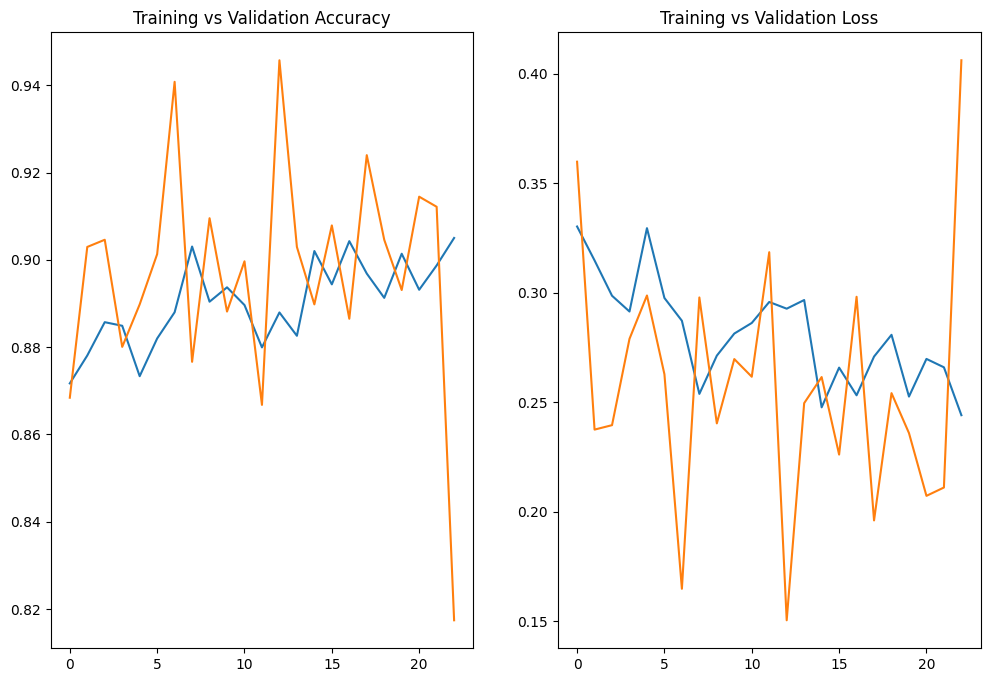

In [75]:
# plot the training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.plot(range(len(accuracy)), accuracy, label="Training Accuracy")
plt.plot(range(len(val_accuracy)), val_accuracy, label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label="Training Loss")
plt.plot(range(len(val_loss)), val_loss, label="Validation Loss")
plt.title("Training vs Validation Loss")

In [10]:
def predict_category(html_file):
    '''
    Predict the category of the html file
    :param html_file: the path to the html file
    :return: the predicted category
    '''
    extracted_text = extract_data_from_html(html_file)
    processed_text = preprocessing(extracted_text)
    model = Word2Vec.load("word2vec_model.bin") 
    features = sentence_embeddings(processed_text, model)
    features = np.expand_dims(features, axis=0)
    features = np.expand_dims(features, axis=2)
    feature_tensors = tf.convert_to_tensor(features, dtype=tf.float64)
    model = tf.keras.models.load_model("model.keras")
    prediction = model.predict(feature_tensors)
    predicted_category = np.argmax(prediction)

    target = {0: "Balance Sheets", 1: "Income Statement",
              2: "Cash Flow", 3: "Notes", 4: "Others"}
    predicted_category = target[predicted_category]
    confidence = round(np.max(prediction) * 100, 2)
    
    print(f"Predicted Category: {predicted_category}")
    print(f"Confidence: {confidence}%")
    return predicted_category, confidence

In [17]:
html_file = './sample/balance_Sheets_sample.html'
predict_category(html_file)

/Users/mominagull/Projects/doc_classification/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
Predicted Category: Balance Sheets
Confidence: 94.77%


('Balance Sheets', 94.77)

In [18]:
html_file = './sample/cash_flow_sample.html'
predict_category(html_file)

/Users/mominagull/Projects/doc_classification/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
Predicted Category: Cash Flow
Confidence: 98.92%


('Cash Flow', 98.92)

In [19]:
html_file = './sample/income_statement_sample.html'
predict_category(html_file)

/Users/mominagull/Projects/doc_classification/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
Predicted Category: Income Statement
Confidence: 99.68%


('Income Statement', 99.68)

In [20]:
html_file = './sample/notes_sample.html'
predict_category(html_file)

/Users/mominagull/Projects/doc_classification/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
Predicted Category: Notes
Confidence: 94.02%


('Notes', 94.02)

In [21]:
html_file = './sample/others_sample.html'
predict_category(html_file)

/Users/mominagull/Projects/doc_classification/.venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
Predicted Category: Others
Confidence: 81.41%


('Others', 81.41)